<a href="https://colab.research.google.com/github/Mahesh0468/Codsoft/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Churn_Modelling.csv')

Explore Data Analysis

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis = 'columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Visual Represntation

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


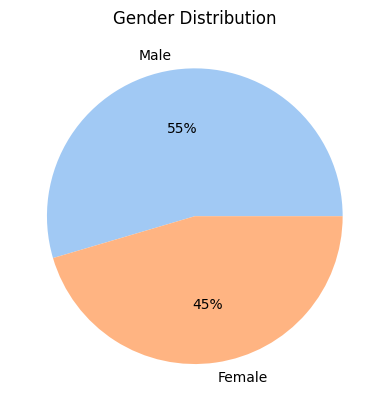

In [ ]:
gender_count = df['Gender'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(gender_count, labels = gender_count.index, colors = colors, autopct='%.0f%%')
plt.title('Gender Distribution')
plt.show()

<Axes: xlabel='count', ylabel='Geography'>

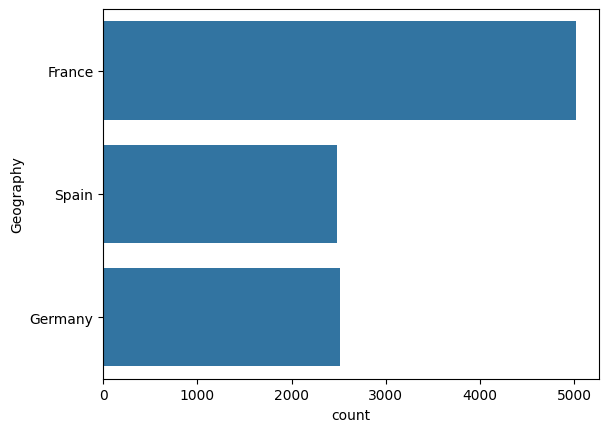

In [ ]:
sns.countplot(df['Geography'])

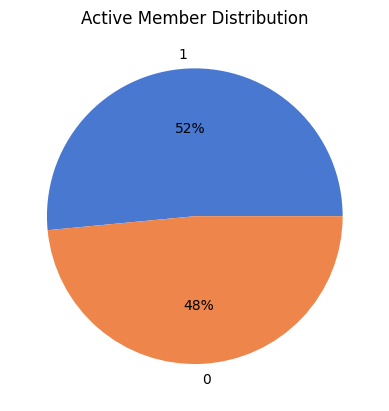

In [ ]:
active_count = df['IsActiveMember'].value_counts()
colors = sns.color_palette('muted')
plt.pie(active_count, labels = active_count.index, colors = colors, autopct='%.0f%%')
plt.title('Active Member Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

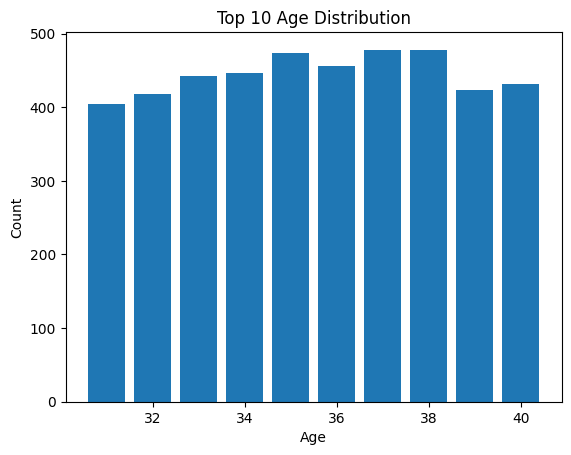

In [ ]:
top_age = df['Age'].value_counts().head(10)
plt.bar(top_age.index, top_age.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Top 10 Age Distribution')
plt.show

Data Cleaning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
cols_to_scale = ['Tenure', 'Balance', 'EstimatedSalary']
df[cols_to_scale] = scaled.fit_transform(df[cols_to_scale])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.2,0.000000,1,1,1,0.506735,1
1,608,Spain,Female,41,0.1,0.334031,1,0,1,0.562709,0
2,502,France,Female,42,0.8,0.636357,3,1,0,0.569654,1
3,699,France,Female,39,0.1,0.000000,2,0,0,0.469120,0
4,850,Spain,Female,43,0.2,0.500246,1,1,1,0.395400,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_to_encode = ['Geography', 'Gender']
df[cols_to_encode] = df[cols_to_encode].apply(le.fit_transform) # Apply LabelEncoder to each column
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,0.2,0.000000,1,1,1,0.506735,1
1,608,2,0,41,0.1,0.334031,1,0,1,0.562709,0
2,502,0,0,42,0.8,0.636357,3,1,0,0.569654,1
3,699,0,0,39,0.1,0.000000,2,0,0,0.469120,0
4,850,2,0,43,0.2,0.500246,1,1,1,0.395400,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
cols_to_scaled = ['CreditScore', 'Age']
df[cols_to_scaled] = scaled.fit_transform(df[cols_to_scaled])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,2,0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,2,0,0.337838,0.2,0.500246,1,1,1,0.395400,0


Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['Exited'], axis = 'columns')
y = df['Exited']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
xtrain.shape

(8000, 10)

In [ ]:
ytrain.shape

(8000,)

In [ ]:
xtrain

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,0.672,0,1,0.189189,0.6,0.000000,2,1,1,0.895494
1561,0.564,1,1,0.324324,0.4,0.476786,2,1,1,0.979930
1670,0.418,2,1,0.081081,0.3,0.457317,1,1,0,0.429438
6087,0.422,0,0,0.121622,0.9,0.540606,1,1,0,0.765417
6669,0.334,0,1,0.513514,0.9,0.566554,1,0,0,0.197401
...,...,...,...,...,...,...,...,...,...,...
5734,0.836,0,1,0.486486,0.8,0.277853,1,1,1,0.346880
5191,0.664,0,0,0.540541,0.1,0.000000,1,1,1,0.003475
5390,0.770,0,0,0.270270,0.1,0.000000,3,0,0,0.461087
860,0.634,0,1,0.337838,0.8,0.758186,1,1,0,0.487529


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
lr.score(xtrain, ytrain)

0.8085

In [ ]:
from sklearn.metrics import accuracy_score
ypred = lr.predict(xtest)
accuracy_score(ytest, ypred)

0.816

Got 81 % of accuracy with Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [ ]:
from sklearn.metrics import accuracy_score
ypred = rfc.predict(xtest)
accuracy_score(ytest, ypred)

0.8665

Got 86 % accuracy with Random Forest Classifier

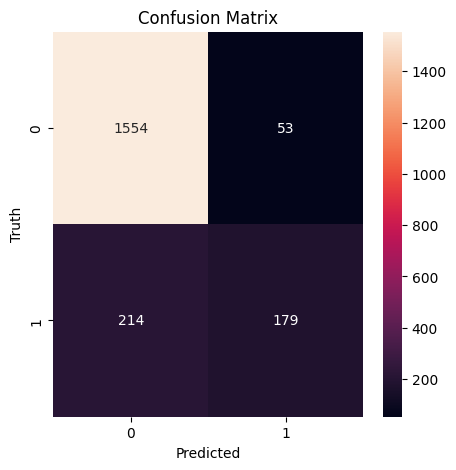

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

So we can say that model worked pretty well.